In [1]:
#2 (a).
import numpy as np

# Define the data
data = np.array([
    [2.1, -2.5],
    [1.1, -3.1],
    [1.4, -2.1],
    [3.3, -1.8],
    [4.4, 6.5],
    [3.4, 5.8],
    [4.5, 7.2],
    [4.1, 5.65],
    [-1.3, -2.3],
    [-3.2, -4.5],
    [-3.2, -4.5],
    [-2.1, -3.3]
])

# Compute mean vector μ over all samples
mu = np.mean(data, axis=0)
print("Mean vector μ:", mu)

# Compute class means μ1, μ2, and μ3
mu1 = np.mean(data[:4], axis=0)
mu2 = np.mean(data[4:8], axis=0)
mu3 = np.mean(data[8:], axis=0)
print("Class mean μ1:", mu1)
print("Class mean μ2:", mu2)
print("Class mean μ3:", mu3)


Mean vector μ: [1.20833333 0.0875    ]
Class mean μ1: [ 1.975 -2.375]
Class mean μ2: [4.1    6.2875]
Class mean μ3: [-2.45 -3.65]


In [2]:
#2(b)
# Compute covariance matrix Σ for each class Σ1, Σ2, Σ3
cov1 = np.cov(data[:4], rowvar=False)
cov2 = np.cov(data[4:8], rowvar=False)
cov3 = np.cov(data[8:], rowvar=False)
print("Covariance matrix Σ1:")
print(cov1)
print("Covariance matrix Σ2:")
print(cov2)
print("Covariance matrix Σ3:")
print(cov3)


Covariance matrix Σ1:
[[0.95583333 0.4075    ]
 [0.4075     0.31583333]]
Covariance matrix Σ2:
[[0.24666667 0.25666667]
 [0.25666667 0.50729167]]
Covariance matrix Σ3:
[[0.85666667 0.98333333]
 [0.98333333 1.13      ]]


In [17]:
#2(d)
import numpy as np

def discriminant_function(x, mean_vectors, inv_cov_matrices, log_determinants, prior_probs):
    num_classes = len(mean_vectors)
    discriminants = np.zeros(num_classes)

    for i, class_label in enumerate(mean_vectors.keys()):
        mahalanobis_dist = np.dot(np.dot((x - mean_vectors[class_label]).T, inv_cov_matrices[class_label]), (x - mean_vectors[class_label]))
        discriminants[i] = -0.5 * mahalanobis_dist - 0.5 * log_determinants[class_label] + np.log(prior_probs[class_label])

        print(f"Discriminant function value for class {class_label}: {discriminants[i]}")

    return discriminants

# Example usage:
# Assuming class_arrays is a dictionary containing class labels as keys and data arrays as values
class_arrays = {
    'w1': np.array([[2.1, -2.5], [1.1, -3.1], [1.4, -2.1], [3.3, -1.8]]),
    'w2': np.array([[4.4, 6.5], [3.4, 5.8], [4.5, 7.2], [4.1, 5.65]]),
    'w3': np.array([[-1.3, -2.3], [-3.2, -4.5], [-3.2, -4.5], [-2.1, -3.3]])
}

# Precompute inverse covariance matrices and log determinants
inv_cov_matrices = {key: np.linalg.inv(np.cov(class_arrays[key].T)) for key in class_arrays.keys()}
log_determinants = {key: np.log(np.linalg.det(np.cov(class_arrays[key].T))) for key in class_arrays.keys()}

# Define mean vectors, covariance matrices, and prior probabilities for each class
mean_vectors = {key: np.mean(class_arrays[key], axis=0) for key in class_arrays.keys()}
total_samples = sum(len(class_arrays[key]) for key in class_arrays.keys())
prior_probs = {key: len(class_arrays[key]) / total_samples for key in class_arrays.keys()}

# Define a different sample input vector x
x = np.array([0.5, 2.0])

# Compute the discriminant function for the different sample input vector
discriminant_values = discriminant_function(x, mean_vectors, inv_cov_matrices, log_determinants, prior_probs)

Discriminant function value for class w1: -89.33725313537116
Discriminant function value for class w2: -26.566366081311102
Discriminant function value for class w3: -2018.7153747779232


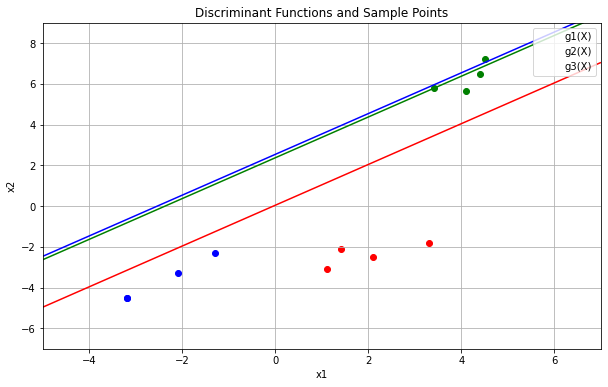

In [22]:
#2(e)
import numpy as np
import matplotlib.pyplot as plt

# Class data
data = {
    'w1': np.array([[2.1, -2.5], [1.1, -3.1], [1.4, -2.1], [3.3, -1.8]]),
    'w2': np.array([[4.4, 6.5], [3.4, 5.8], [4.5, 7.2], [4.1, 5.65]]),
    'w3': np.array([[-1.3, -2.3], [-3.2, -4.5], [-3.2, -4.5], [-2.1, -3.3]])
}

# Compute mean for each class
mean_w1 = np.mean(data['w1'], axis=0)
mean_w2 = np.mean(data['w2'], axis=0)
mean_w3 = np.mean(data['w3'], axis=0)

# Compute weights for discriminant functions
w0_w1 = -0.5 * (mean_w1[0] + mean_w1[1])
w1_w1 = mean_w1[0] - mean_w1[1]
w2_w1 = mean_w1[1] - mean_w1[0]

w0_w2 = -0.5 * (mean_w2[0] + mean_w2[1])
w1_w2 = mean_w2[0] - mean_w2[1]
w2_w2 = mean_w2[1] - mean_w2[0]

w0_w3 = -0.5 * (mean_w3[0] + mean_w3[1])
w1_w3 = mean_w3[0] - mean_w3[1]
w2_w3 = mean_w3[1] - mean_w3[0]

# Define discriminant functions
def g1(X):
    return w0_w1 + w1_w1*X[:, 0] + w2_w1*X[:, 1]

def g2(X):
    return w0_w2 + w1_w2*X[:, 0] + w2_w2*X[:, 1]

def g3(X):
    return w0_w3 + w1_w3*X[:, 0] + w2_w3*X[:, 1]

# Generate sample points for plotting
x1_range = np.linspace(-5, 7, 100)
x2_range = np.linspace(-7, 9, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
points = np.c_[X1.ravel(), X2.ravel()]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the discriminant functions
contour1 = plt.contour(X1, X2, g1(points).reshape(X1.shape), levels=[0], colors='r')
contour2 = plt.contour(X1, X2, g2(points).reshape(X1.shape), levels=[0], colors='g')
contour3 = plt.contour(X1, X2, g3(points).reshape(X1.shape), levels=[0], colors='b')

# Add labels for discriminant functions in the legend
plt.legend([contour1.collections[0], contour2.collections[0], contour3.collections[0]],
           ['g1(X)', 'g2(X)', 'g3(X)'])

# Plot the sample points
plt.scatter(data['w1'][:, 0], data['w1'][:, 1], color='red', marker='o', label='w1')
plt.scatter(data['w2'][:, 0], data['w2'][:, 1], color='green', marker='o', label='w2')
plt.scatter(data['w3'][:, 0], data['w3'][:, 1], color='blue', marker='o', label='w3')

# Set labels and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Discriminant Functions and Sample Points')
plt.grid(True)
plt.show()